Verteilung der Wörter: 

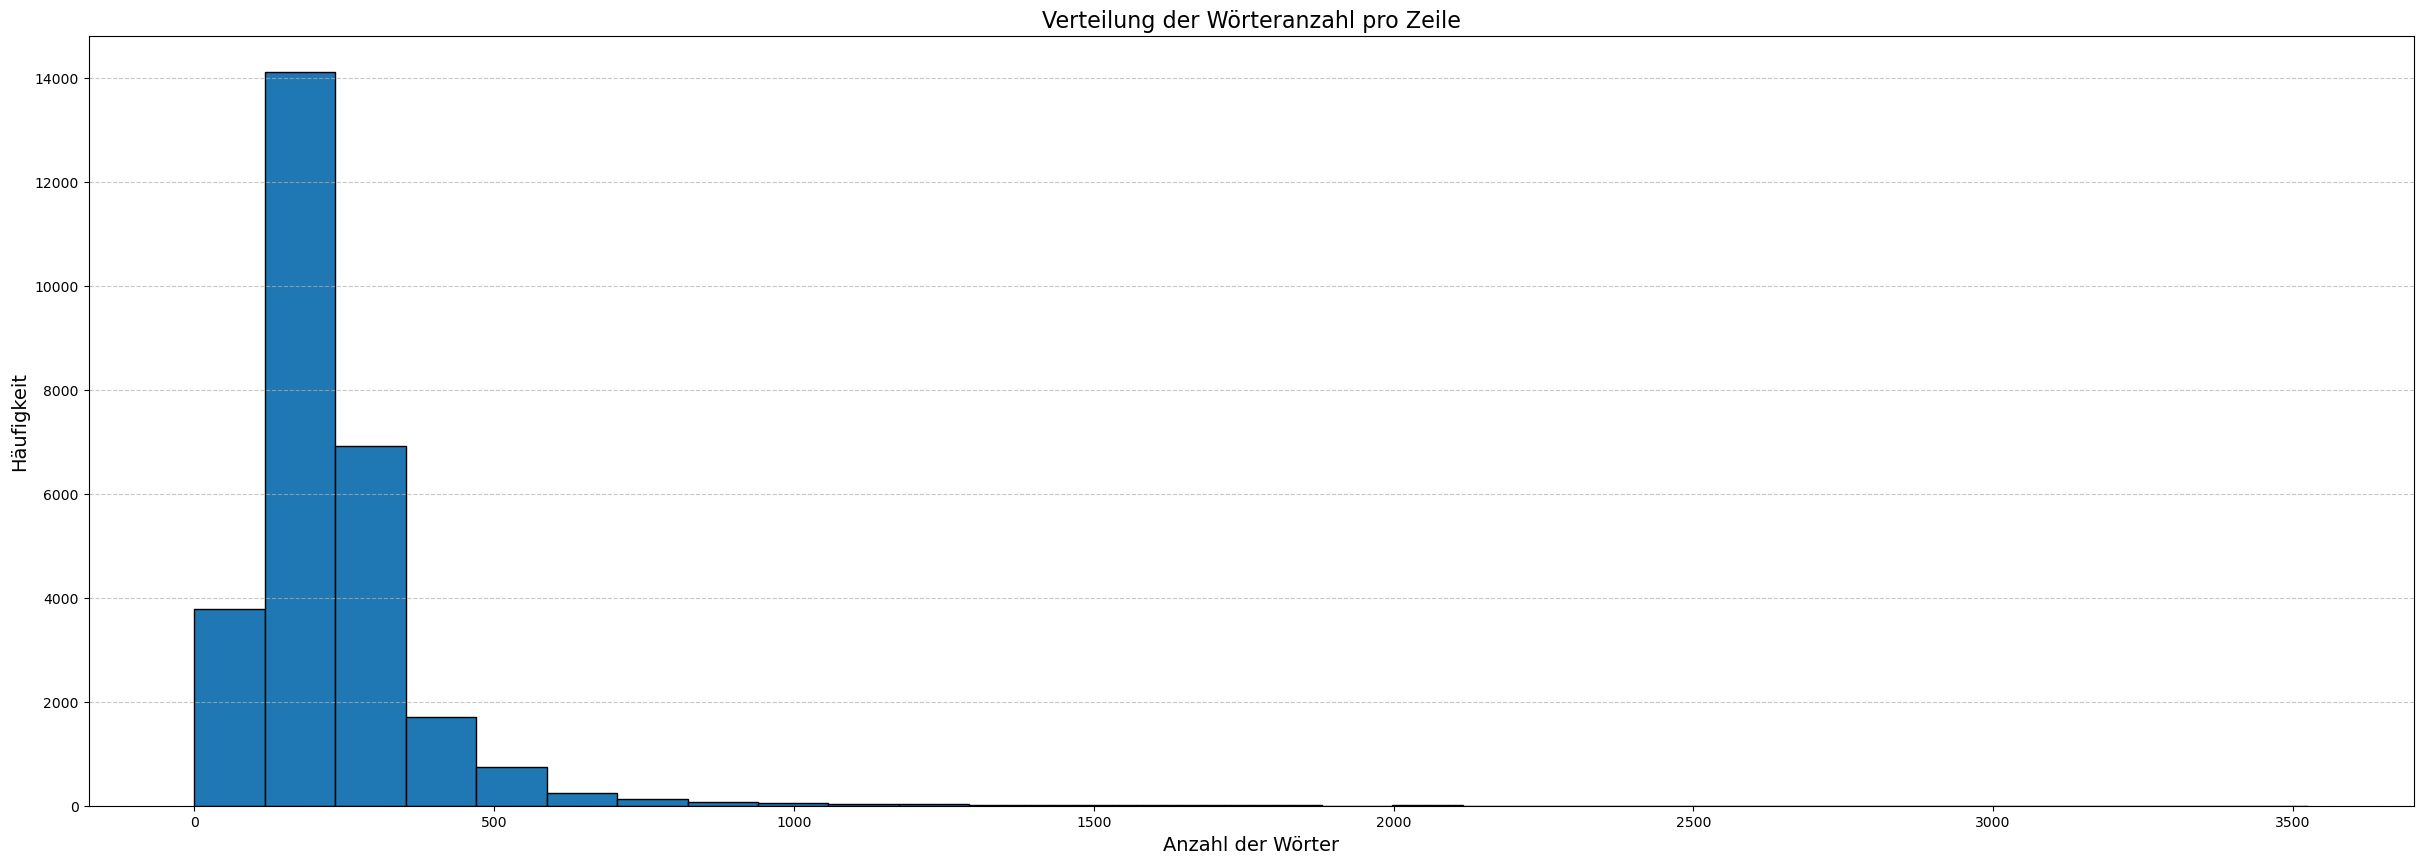

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV-Datei einlesen
file_path = "v2_2_4_merged_lines.csv"  
data = pd.read_csv(file_path)

# Überprüfen, ob die Spalte 'text' existiert
if 'text' not in data.columns:
    print("Die Spalte 'text' existiert nicht in der Datei.")
    exit()

# Berechnung der Wörteranzahl pro Zeile
data['word_count'] = data['text'].apply(lambda x: len(str(x).split()) if isinstance(x, str) else 0)

# Verteilung der Wörteranzahl anzeigen
plt.figure(figsize=(30, 10))
plt.hist(data['word_count'], bins=30, edgecolor='black')
plt.title('Verteilung der Wörteranzahl pro Zeile', fontsize=16)
plt.xlabel('Anzahl der Wörter', fontsize=14)
plt.ylabel('Häufigkeit', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Feingranulare Betrachtung: 100 Wörter und weniger

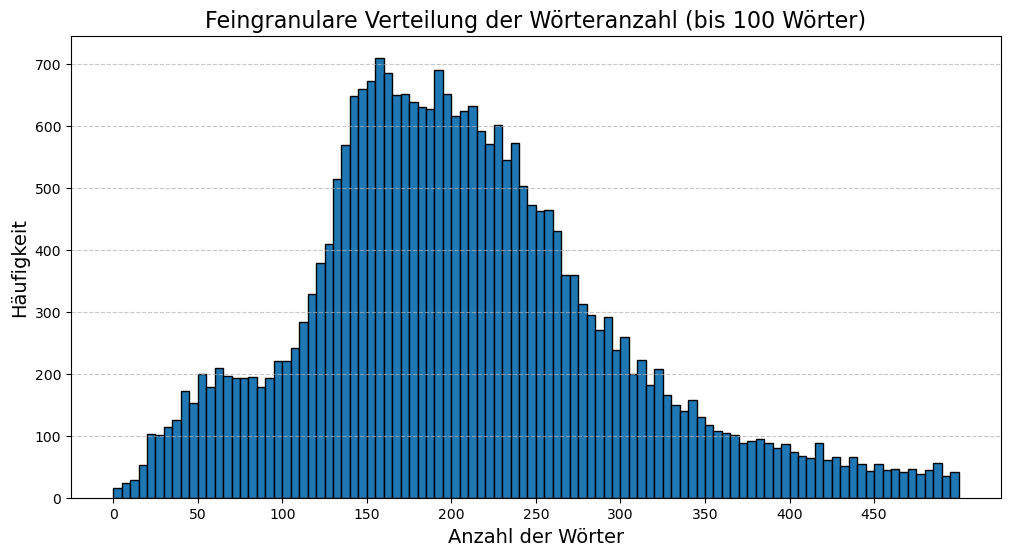

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV-Datei einlesen
file_path = "v2_2_4_merged_lines.csv"  
data = pd.read_csv(file_path)

# Überprüfen, ob die Spalte 'text' existiert
if 'text' not in data.columns:
    print("Die Spalte 'text' existiert nicht in der Datei.")
    exit()

# Berechnung der Wörteranzahl pro Zeile
data['word_count'] = data['text'].apply(lambda x: len(str(x).split()) if isinstance(x, str) else 0)

# Filtern auf Zeilen mit bis zu 100 Wörtern
filtered_data = data[data['word_count'] <= 500]

# Verteilung der Wörteranzahl anzeigen
plt.figure(figsize=(12, 6))
plt.hist(filtered_data['word_count'], bins=100, range=(0, 500), edgecolor='black')
plt.title('Feingranulare Verteilung der Wörteranzahl (bis 100 Wörter)', fontsize=16)
plt.xlabel('Anzahl der Wörter', fontsize=14)
plt.ylabel('Häufigkeit', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(0, 500, 50))
plt.show()


Kurze Reden (bis 40 Wörter) wurden in short_speeches.csv gespeichert.


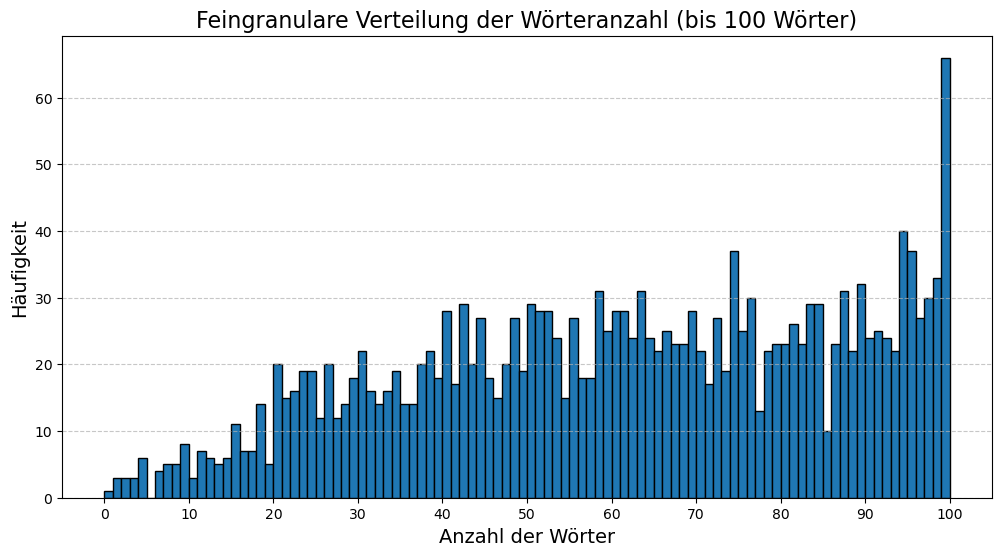

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Datei-Pfade
file_path = "v2_2_4_further_data_cleaning.csv"   
output_file_short = "short_speeches.csv"  # CSV für Reden bis 40 Wörter

# CSV-Datei einlesen
data = pd.read_csv(file_path)

# Überprüfen, ob die Spalte 'text' existiert
if 'text' not in data.columns:
    print("Die Spalte 'text' existiert nicht in der Datei.")
    exit()

# Berechnung der Wörteranzahl pro Zeile
data['word_count'] = data['text'].apply(lambda x: len(str(x).split()) if isinstance(x, str) else 0)

# Reden mit bis zu 40 Wörtern extrahieren
short_speeches = data[data['word_count'] <= 100]

# Speichern der kurzen Reden in eine separate CSV-Datei
short_speeches.to_csv(output_file_short, index=False)
print(f"Kurze Reden (bis 40 Wörter) wurden in {output_file_short} gespeichert.")

# Filtern auf Zeilen mit bis zu 100 Wörtern für das Histogramm
filtered_data = data[data['word_count'] <= 100]

# Verteilung der Wörteranzahl anzeigen
plt.figure(figsize=(12, 6))
plt.hist(filtered_data['word_count'], bins=100, range=(0, 100), edgecolor='black')
plt.title('Feingranulare Verteilung der Wörteranzahl (bis 100 Wörter)', fontsize=16)
plt.xlabel('Anzahl der Wörter', fontsize=14)
plt.ylabel('Häufigkeit', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(0, 101, 10))
plt.show()


Eindeutige IDs - für späteres Merging der Labels - da im folgenden Zeilen zu Teilen gruppiert werden. 

In [14]:
import pandas as pd

# Datei-Pfade
# file_path = "v2_2_3_additional_stoppwords_removed.csv" 
file_path = "v2_2_1_separat_speeches.csv" 
output_file = "v2_2_1_u_seperat_speeches.csv"     

# CSV-Datei einlesen
data = pd.read_csv(file_path)

# Schritt 1: Hinzufügen einer Spalte mit eindeutigen IDs
data.insert(0, 'unique_id', range(1, len(data) + 1))
data.to_csv(output_file, index=False)

 Es fällt auf das Überschneidungen bestehen und anscheinend manche Reden durch Zwischenfragen gesplitet wurden. 
 Daher sollen Reden zusammengefügt werden wenn zum selben Datum und ID der selbe Sprecher spricht.  

In [17]:
import pandas as pd

# Datei-Pfade
file_path1 = "v2_2_4_u.csv"
output_file1 = "v2_2_4_u_1.csv"

file_path2 = "v2_2_1_u_seperat_speeches.csv"
output_file2 = "v2_2_1_u_1_seperat_speeches.csv"

# Funktion zur Verarbeitung einer Datei
def process_file(file_path, output_file):
    # CSV-Datei einlesen
    data = pd.read_csv(file_path)

    # Konvertiere die Spalte 'text' in Strings und ersetze NaN durch leere Strings
    data['text'] = data['text'].fillna('').astype(str)

    # Gruppieren nach id, dokumentnummer, datum und Sprecher
    grouped_data = (
        data.groupby(['id', 'dokumentnummer', 'datum', 'Sprecher'], as_index=False)
        .agg({
            'unique_id': 'first', # unique_id bleibt aus der ersten Zeile erhalten
            'text': ' '.join,  # Text aus Zeilen derselben Gruppe zusammenfügen
            'Partei': 'first', # Partei bleibt aus der ersten Zeile erhalten
            'Dr.': 'first',    # Dr. bleibt aus der ersten Zeile erhalten
            'Amt': 'first'     # Amt bleibt aus der ersten Zeile erhalten
        })
    )

    # Zähle, wie viele Zeilen zusammengeführt wurden
    merge_counts = data.groupby(['id', 'dokumentnummer', 'datum', 'Sprecher']).size()
    total_merges = (merge_counts - 1).sum()  # Anzahl der zusammengeführten Zeilen
    print(f"Gesamtanzahl der zusammengeführten Zeilen in {file_path}: {total_merges}")

    # Daten speichern
    grouped_data.to_csv(output_file, index=False)
    print(f"Die vereinigten Daten wurden in {output_file} gespeichert.")

    return grouped_data

# Dateien verarbeiten
grouped_data1 = process_file(file_path1, output_file1)
grouped_data2 = process_file(file_path2, output_file2)

# Vergleich der Dateien abgesehen von der 'text'-Spalte
columns_to_compare = [col for col in grouped_data1.columns if col != 'text']

identical_rows = grouped_data1[columns_to_compare].equals(grouped_data2[columns_to_compare])
if identical_rows:
    print("Die beiden Dateien sind abgesehen von der Textspalte identisch.")
else:
    print("Die beiden Dateien sind abgesehen von der Textspalte nicht identisch.")

Gesamtanzahl der zusammengeführten Zeilen in v2_2_4_u.csv: 6561
Die vereinigten Daten wurden in v2_2_4_u_1.csv gespeichert.
Gesamtanzahl der zusammengeführten Zeilen in v2_2_1_u_seperat_speeches.csv: 6561
Die vereinigten Daten wurden in v2_2_1_u_1_seperat_speeches.csv gespeichert.
Die beiden Dateien sind abgesehen von der Textspalte identisch.


Gesamtanzahl der zusammengeführten Zeilen in v2_2_4_u.csv: 6561
Die vereinigten Daten wurden in v2_2_4_u_1.csv gespeichert.
Gesamtanzahl der zusammengeführten Zeilen in v2_2_1_u_seperat_speeches.csv: 6561
Die vereinigten Daten wurden in v2_2_1_u_1_seperat_speeches.csv gespeichert.
Die beiden Dateien sind abgesehen von der Textspalte identisch.



Folglich Entfernen der Nachfragen wenn sie als solche im Titel gekennzeichent sind. 

In [19]:
import pandas as pd

# Datei-Pfad

file_path1 = "v2_2_4_u_1.csv"
output_file1 = "v2_2_4_u_2.csv"
file_path2 = "v2_2_1_u_1_seperat_speeches.csv"
output_file2 = "v2_2_1_u_2_seperat_speeches.csv"

def process_file(file_path, output_file):
    # CSV-Datei einlesen
    data = pd.read_csv(file_path)
    # Entferne Zeilen, bei denen die Spalte 'Sprecher' die Worte "Frage de" oder "Ergebnis" enthält
    filtered_data = data[~data['Sprecher'].str.contains("Frage|Ergebnis", na=False, case=False)]
    filtered_data.to_csv(output_file, index=False)
    print(f"Gefilterte Daten wurden in {output_file} gespeichert.")

process_file(file_path1, output_file1)
process_file(file_path2, output_file2)

Gefilterte Daten wurden in v2_2_4_u_2.csv gespeichert.
Gefilterte Daten wurden in v2_2_1_u_2_seperat_speeches.csv gespeichert.


Außerdem werden nach der Analyse der obigen Verteilung der Wörter - alle Reden unter 50 Wörtern als nachfragen charakterisiert und ebenso 

In [21]:
import pandas as pd

# Datei-Pfade
file_path1 = "v2_2_4_u_2.csv"
output_file1 = "v2_2_4_final_data_cleaning.csv" 
file_path2 = "v2_2_1_u_2_seperat_speeches.csv"
output_file2 = "v2_2_1_unique_separat_speeches.csv"

def process_files(file_path1, output_file1, file_path2, output_file2):
    # Datei 1 einlesen
    data1 = pd.read_csv(file_path1)

    # Wörteranzahl in der Spalte 'text' berechnen
    data1['word_count'] = data1['text'].apply(lambda x: len(str(x).split()) if isinstance(x, str) else 0)

    # IDs der Zeilen mit weniger als 50 Wörtern erfassen
    ids_to_remove = data1[data1['word_count'] < 50]['unique_id'].tolist()

    # Zeilen mit weniger als 50 Wörtern aus Datei 1 entfernen
    filtered_data1 = data1[data1['word_count'] >= 50].drop(columns=['word_count'])

    # Gefilterte Daten speichern
    filtered_data1.to_csv(output_file1, index=False)
    print(f"Gefilterte Daten aus {file_path1} wurden in {output_file1} gespeichert.")

    # Datei 2 einlesen
    data2 = pd.read_csv(file_path2)

    # Zeilen entfernen, deren 'unique_id' in den zu entfernenden IDs enthalten ist
    filtered_data2 = data2[~data2['unique_id'].isin(ids_to_remove)]

    # Gefilterte Daten speichern
    filtered_data2.to_csv(output_file2, index=False)
    print(f"Gefilterte Daten aus {file_path2} wurden in {output_file2} gespeichert.")

    # Prüfung, ob die Dateien (abgesehen von der 'text'-Spalte) identisch sind
    comparison_columns = [col for col in filtered_data1.columns if col != 'text']
    data1_comp = filtered_data1[comparison_columns].reset_index(drop=True)
    data2_comp = filtered_data2[comparison_columns].reset_index(drop=True)

    if data1_comp.equals(data2_comp):
        print("Die Dateien sind abgesehen von der 'text'-Spalte identisch.")
    else:
        print("Die Dateien sind abgesehen von der 'text'-Spalte nicht identisch.")

# Aufruf der Funktion
process_files(file_path1, output_file1, file_path2, output_file2)


Gefilterte Daten aus v2_2_4_u_2.csv wurden in v2_2_4_final_data_cleaning.csv gespeichert.
Gefilterte Daten aus v2_2_1_u_2_seperat_speeches.csv wurden in v2_2_1_unique_separat_speeches.csv gespeichert.
Die Dateien sind abgesehen von der 'text'-Spalte identisch.


Prüfen ob noch Duplikate in irgeneiner Form vorhanden sind:

In [ ]:
import pandas as pd

# Pfad zur Eingabedatei
input_csv_path = "v2_2_4_final_data_cleaning.csv"
# Pfad zur Ausgabedatei für Duplikate
duplicates_csv = "v2_2_4_exp_final_data_cleaning.csv"
# CSV-Datei einlesen

try:
    df = pd.read_csv(input_csv_path)
    print("CSV-Datei erfolgreich eingelesen.")
except Exception as e:
    print(f"Fehler beim Einlesen der CSV-Datei: {e}")
    exit()

# Überprüfen, ob die benötigten Spalten vorhanden sind
required_columns = ['id', 'datum', 'Sprecher']
if not all(column in df.columns for column in required_columns):
    print(f"Fehlende Spalten: {set(required_columns) - set(df.columns)}")
    exit()

# Duplikate auf Basis der Kombination von 'id', 'datum', und 'sprecher' suchen
duplicates = df[df.duplicated(subset=required_columns, keep=False)]

if duplicates.empty:
    print("Keine Duplikate gefunden.")
else:
    print(f"{len(duplicates)} Duplikate gefunden.")
    
    # Duplikate in eine separate CSV-Datei schreiben
    try:
        duplicates.to_csv(duplicates_csv, index=False)
        print(f"Duplikate wurden in die Datei gespeichert: {duplicates_csv}")
    except Exception as e:
        print(f"Fehler beim Speichern der Duplikate-Datei: {e}")